# Extra lecture: more about Grover implementation

<center><img src="../figures/dall-e/merlion_detective.png" alt="drawing" width="400"/></center>
<center><strong>Fig. 5:</strong> Merlion investigating Grover's details [DALL-E].</center>

### Introduction 

The aim of this lecture is to delve deeper into the Grover operators implementation.

In [52]:
# import numpy
import numpy as np

# import qibo and set backend
import qibo

# we collected all the grover scripts into scripts.grover
from scripts import plotscripts, utils, grover

qibo.set_backend("qibojit")

from importlib import reload
reload(plotscripts)
reload(grover)
reload(utils)

[Qibo 0.2.4|INFO|2024-02-01 14:42:11]: Using qibojit (numba) backend on /CPU:0


<module 'scripts.utils' from '/home/matteo/Documents/PhD/qclectures/scripts/utils.py'>

In [53]:
# set problem dimensionality
n = 5
# set the number of shots
nshots = 1000000
# generate the bitstrings list
bitstrings = utils.generate_bitstring_combinations(n)
# guilty index
guilty_index = 1
guilty_state = bitstrings[guilty_index]

<center><img src="../figures/grover_details.png" alt="drawing" width="800"/></center>

In [54]:
print(bitstrings)
guilty_state = bitstrings[guilty_index]
print(f"\nGuilty state: {guilty_state}")

['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']

Guilty state: 00001


### Grover until the first layer

In [55]:
# build the first layer
c = grover.build_initial_layer(n)
state = c().state()

print(c.draw())

q0: ─H───
q1: ─H───
q2: ─H───
q3: ─H───
q4: ─H───
q5: ─X─H─


In [56]:
mean = utils.compute_input_register_average_amplitude(state)
mean

0.17677669529663678

0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678


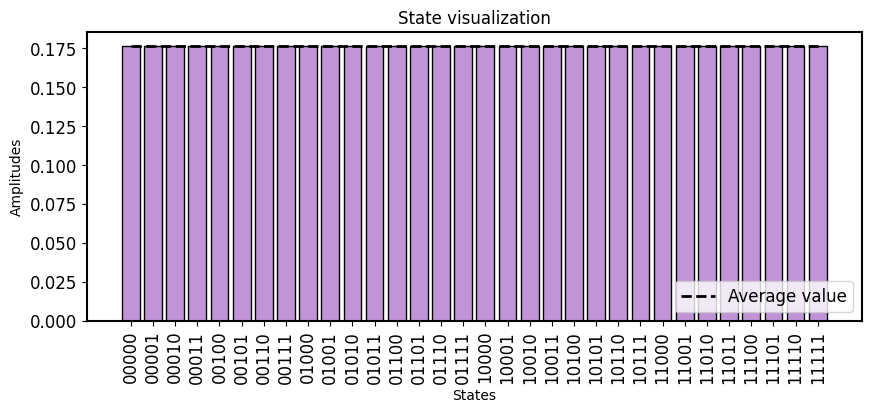

In [57]:
plotscripts.plot_input_register_amplitudes(
    state=state, 
    average_amp_value=mean
)

What about the amplitude if we also consider the ancilla?

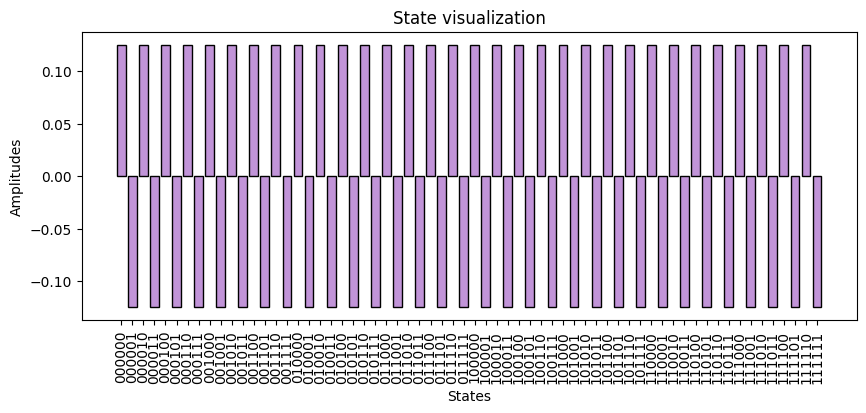

In [58]:
plotscripts.plot_amplitudes(c().state())

Since it was in the $|-\rangle$ st
ate, we have half of amplitudes multiplied by $-1$.

### Grover until the oracle

<center><img src="../figures/oracle_layers.png" alt="drawing" width="800"/></center>

We can study what is happening to the system by setting an extra variable to the `build_oracle` function:

- setting `build_oracle(guilty_state, n, depth=1)` we build only the initial layer of NOT gates;
- setting `build_oracle(guilty_state, n, depth=2)` we build the NOT gates and the multi-controlled NOT;
- setting `build_oracle(guilty_state, n, depth=3)` we build the full oracle.

Setting `depth=None` (namely not setting `depth`) we get the same result of setting `depth=3`.

In [59]:
# initial layer with depth 1, 2, 3
c = grover.build_initial_layer(n) + grover.build_oracle(guilty_state, n, depth=3)
state = c().state()
mean_after_oracle = utils.compute_input_register_average_amplitude(state)

print(c.draw())

q0: ─H─X─o─X─
q1: ─H─X─o─X─
q2: ─H─X─o─X─
q3: ─H─X─o─X─
q4: ─H───o───
q5: ─X─H─X───


0.17677669529663678
-0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678


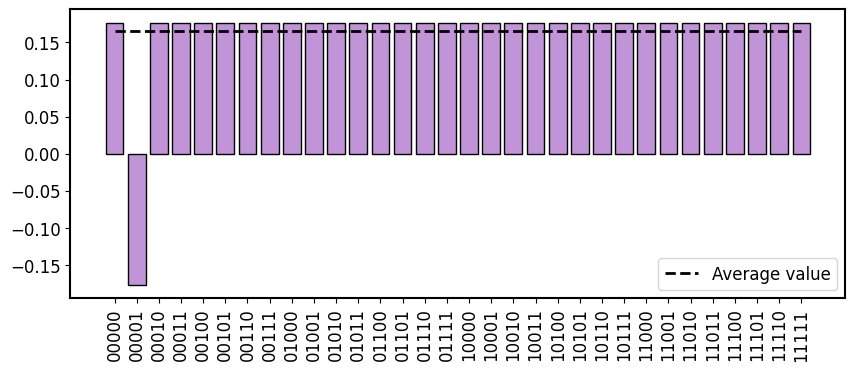

In [60]:
plotscripts.plot_input_register_amplitudes(
    state=c().state(), 
    save_as="step_3", 
    title="Full oracle applied",
    average_amp_value=mean_after_oracle
)

### Grover until the diffusion operator

<center><img src="../figures/diffusion_layers.png" alt="drawing" width="800"/></center>

In [61]:
c = grover.build_initial_layer(n) + grover.build_oracle(guilty_state, n) + grover.build_diffusion_operator(n, depth=6)
state=c().state()

print(c.draw())

q0: ─H─X─o─X─H─X─o─X─H─
q1: ─H─X─o─X─H─X─o─X─H─
q2: ─H─X─o─X─H─X─o─X─H─
q3: ─H─X─o─X─H─X─o─X─H─
q4: ─H───o─H─X───o─X─H─
q5: ─X─H─X─X─────X─────


0.15467960838455708
0.5082329989778304
0.15467960838455705
0.15467960838455705
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455702
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705
0.15467960838455705


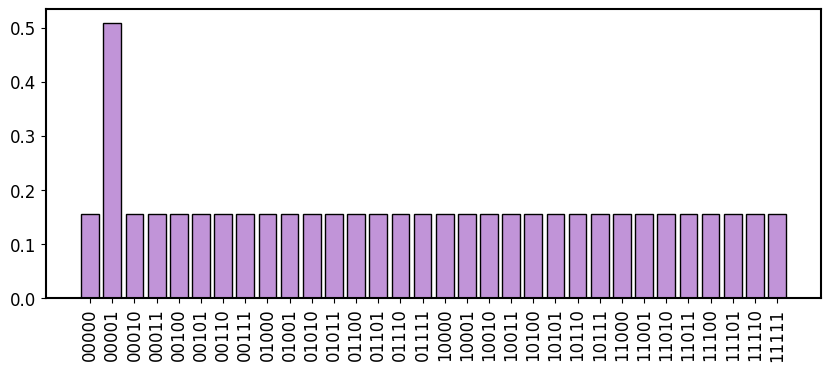

In [62]:
plotscripts.plot_input_register_amplitudes(
    state=state, 
    save_as="step_9", 
    title="H gates to the input register and back to superposition basis",
    #average_amp_value=mean_after_oracle
)

0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678


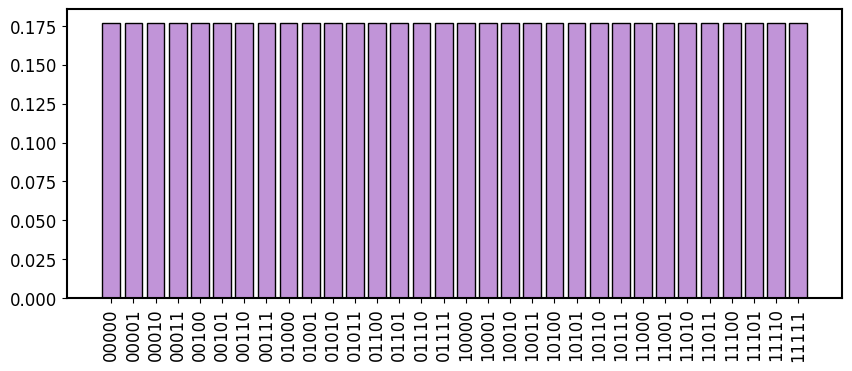

In [63]:
c = grover.build_initial_layer(n) 
state = c().state()

plotscripts.plot_input_register_amplitudes(
    state=state, 
    save_as="big_0", 
    title="H gates to the input register and back to superposition basis",
    #average_amp_value=mean_after_oracle
)

In [64]:
def exec_grover(n, guilty_state, ntimes=1, diff=True):
    c = grover.build_initial_layer(n)
    for i in range(ntimes):
        c += grover.build_oracle(guilty_state, n)
        if i != ntimes - 1:   
            c += grover.build_diffusion_operator(n)
        else:
            if diff is True:
                c+= grover.build_diffusion_operator(n)
    print(c.draw())
    return c().state()

q0: ─H─X─o─X─
q1: ─H─X─o─X─
q2: ─H─X─o─X─
q3: ─H─X─o─X─
q4: ─H───o───
q5: ─X─H─X───
0.17677669529663678
-0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
0.17677669529663678
q0: ─H─X─o─X─H─X─o─X─H─
q1: ─H─X─o─X─H─X─o─X─H─
q2: ─H─X─o─X─H─X─o─X─H─
q3: ─H─X─o─X─H─X─o─X─H─
q4: ─H───o─H─X───o─X─H─
q5: ─X─H─X─X─────X─────
0.15467960838455708
0.5082329989778304
0.15467960838455705
0.15467960838455705
0.15467960838455702
0.15467960838455702
0.1546796083

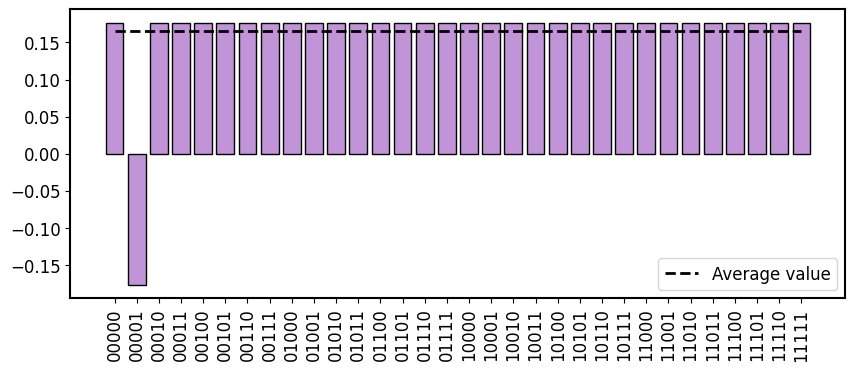

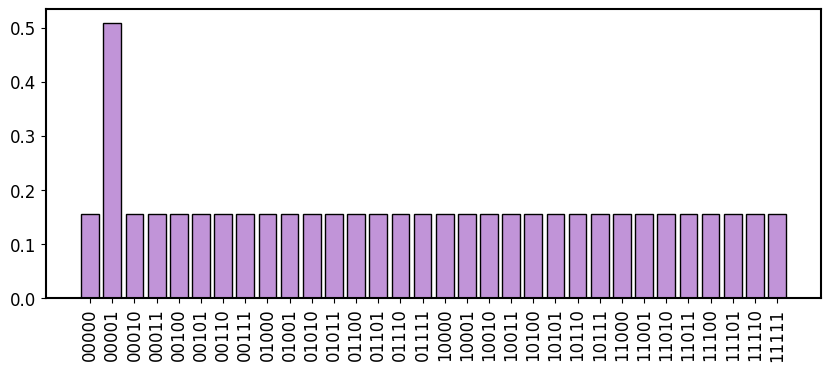

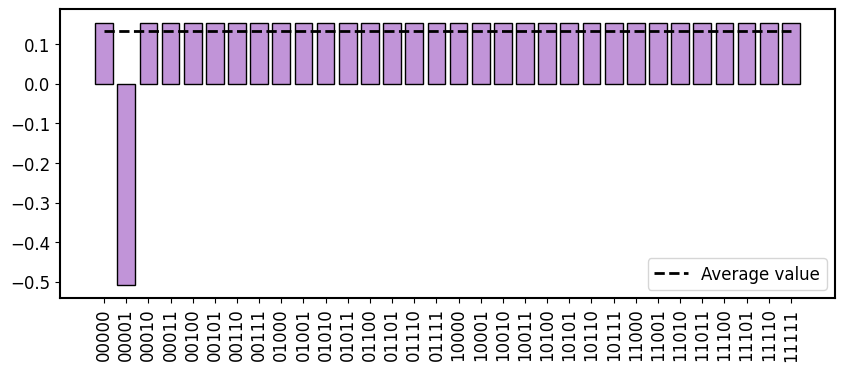

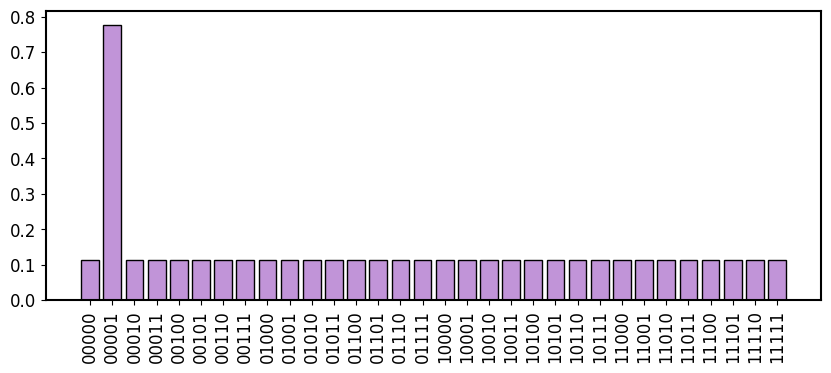

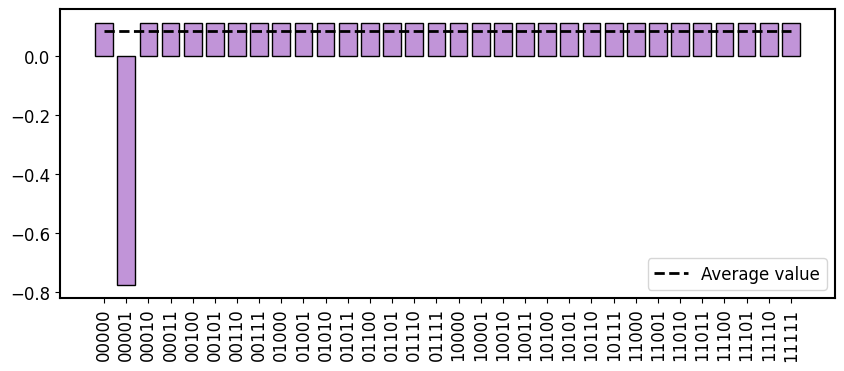

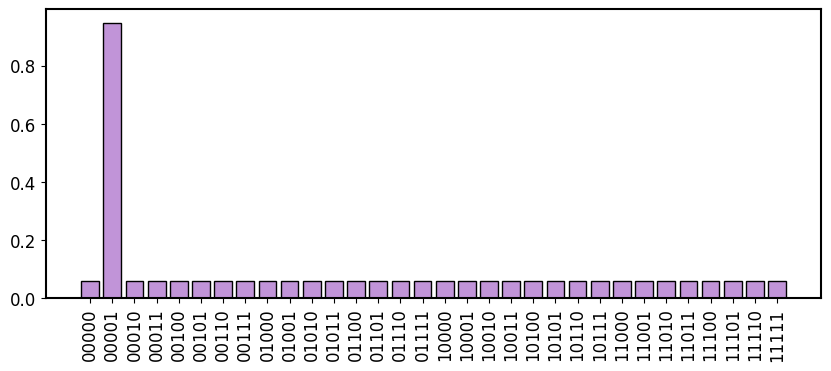

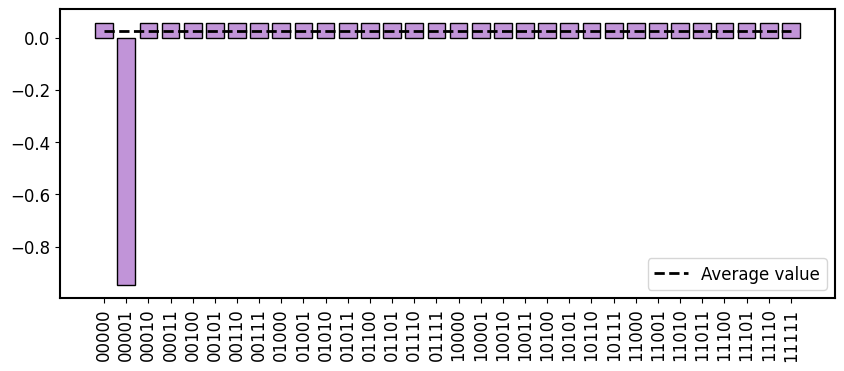

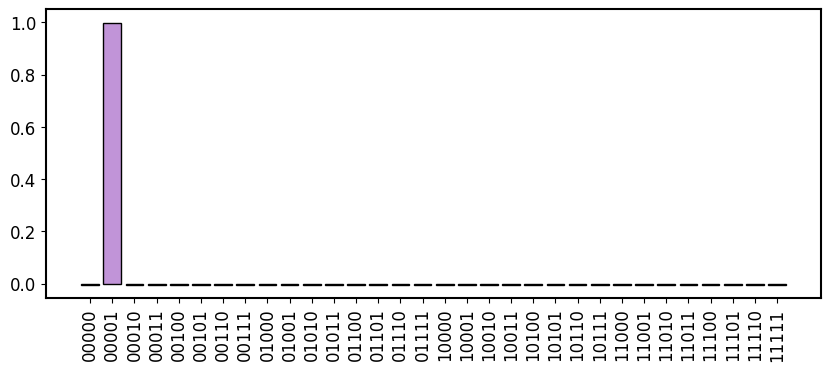

In [65]:
j = 1
for i in range(4):
    state = exec_grover(n, guilty_state, ntimes=i+1, diff=False)
    mean = utils.compute_input_register_average_amplitude(state)
    plotscripts.plot_input_register_amplitudes(state=state, save_as=f"big_{j}", average_amp_value=mean)
    state = exec_grover(n, guilty_state, ntimes=i+1, diff=True)
    plotscripts.plot_input_register_amplitudes(state=state, save_as=f"big_{j+1}")
    print(mean)
    j += 2

q0: ─H─X─o─X─
q1: ─H─X─o─X─
q2: ─H───o───
q3: ─X─H─X───
q0: ─H─X─o─X─H─X─o─X─H─
q1: ─H─X─o─X─H─X─o─X─H─
q2: ─H───o─H─X───o─X─H─
q3: ─X─H─X─X─────X─────
0j


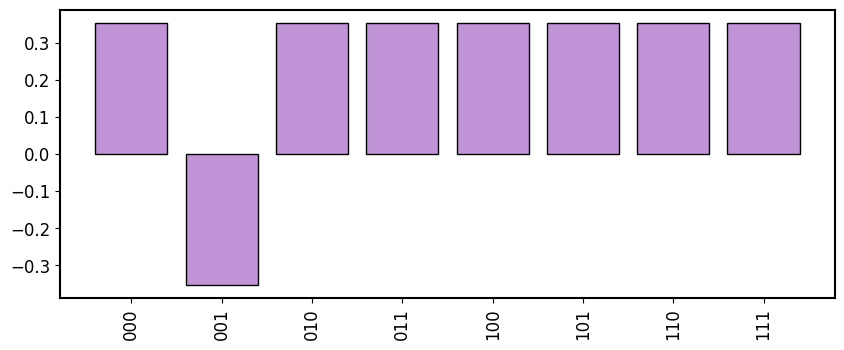

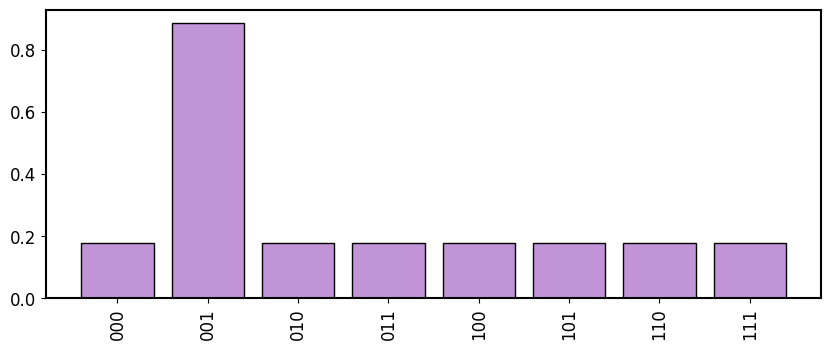

In [36]:
j = 1
for i in range(1):
    state = exec_grover(n, guilty_state, ntimes=i+1, diff=False)
    plotscripts.plot_input_register_amplitudes(state=state, save_as=f"big_{j}")
    state = exec_grover(n, guilty_state, ntimes=i+1, diff=True)
    plotscripts.plot_input_register_amplitudes(state=state, save_as=f"big_{j+1}")
    print(np.mean(state))
    j += 2